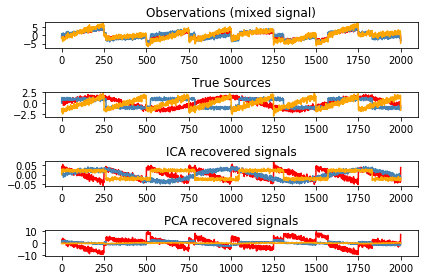

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

### EIGENE VERSUCHE

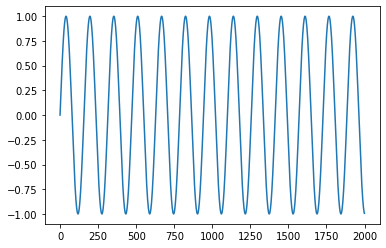

In [300]:
s1=s2=s3=0
n_samples = 2000
time = np.linspace(0, 1, n_samples)
s1 = np.sin(10 * time)  # Signal 1 : sinusoidal signal
plt.plot(s1)

In [313]:
noise1 = 1 * np.random.normal(size=s1.shape)

In [331]:
s2 = s1+noise3

In [332]:
noise2 = 2*np.random.normal(size=s1.shape)
s3 = s1 + noise4

In [337]:
noise3 = 0.1 * np.sin(20 * time)
noise4 = 0.1 * np.sin(50 * time)

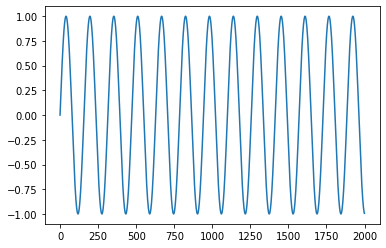

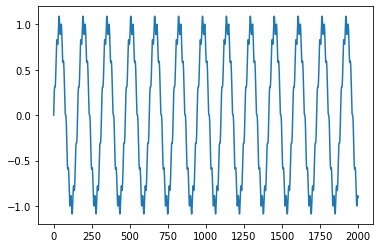

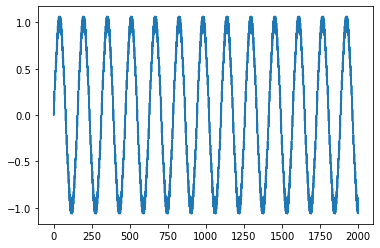

In [338]:
plt.plot(s1)
plt.show()
plt.plot(s2)
plt.show()
plt.plot(s3)
plt.show()

In [339]:
X = np.column_stack((s1,s2,s3))

In [264]:
X.shape

(2000, 3)

In [340]:
ica = FastICA()
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

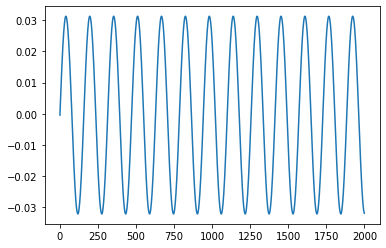

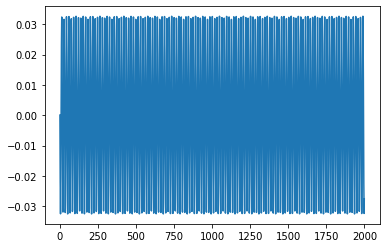

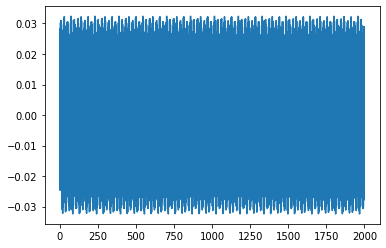

In [341]:
plt.plot(S_[:,0])
plt.show()
plt.plot(S_[:,1])
plt.show()
plt.plot(S_[:,2])
plt.show()

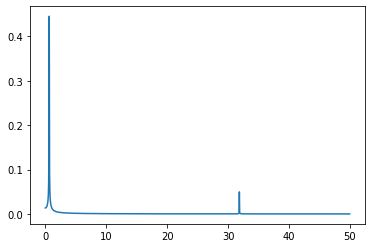

In [357]:
amplitude = s3
samplingFrequency = 100

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency


tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod


# Frequency domain representation

plt.plot(frequencies, abs(fourierTransform))


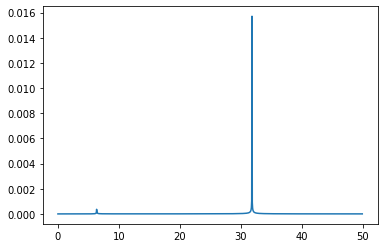

In [366]:
amplitude = S_[:,2]
samplingFrequency = 100

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency


tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod


# Frequency domain representation

plt.plot(frequencies, abs(fourierTransform))